In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
lc = pd.read_csv(r"C:\Users\Admin\Downloads\Projects\lung_cancer\Lung Cancer\dataset_med.csv")

In [3]:
lc.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')

In [4]:
data = lc.copy()

In [5]:
data.pop('id')
data

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


In [6]:
num_col = ['age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer']
b_cat_col = ['gender',  'family_history']
cat_col = ['smoking_status', 'treatment_type']
not_sure_col = ['country', 'diagnosis_date', 'end_treatment_date']

In [7]:
print(data.isnull().sum())

age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64


In [8]:
data['gender'] = data['gender'].map({'Male':0, 'Female':1})
data['family_history'] = data['family_history'].map({'Yes':0, 'No':1})

In [9]:
OE = OrdinalEncoder()
data['cancer_stage'] = OE.fit_transform(data[['cancer_stage']]).astype(int)

In [10]:
r = data['country'].value_counts()
r

country
Malta             33367
Ireland           33243
Portugal          33208
France            33199
Sweden            33161
Croatia           33138
Greece            33052
Spain             33042
Netherlands       33040
Denmark           33024
Slovenia          33005
Belgium           32986
Hungary           32981
Romania           32963
Poland            32949
Italy             32948
Germany           32940
Estonia           32893
Czech Republic    32885
Lithuania         32856
Slovakia          32853
Austria           32832
Finland           32798
Luxembourg        32794
Cyprus            32719
Latvia            32565
Bulgaria          32559
Name: count, dtype: int64

In [11]:
OHE = OneHotEncoder()
encoded = OHE.fit_transform(data[cat_col])
encoded_df = pd.DataFrame(encoded.toarray(), columns = OHE.get_feature_names_out(cat_col))
data = data.drop(columns=cat_col)
data = pd.concat([data, encoded_df], axis = 1)

In [12]:
data['diagnosis_date'] = pd.to_datetime(data['diagnosis_date'])
data['end_treatment_date'] = pd.to_datetime(data['end_treatment_date'])

In [13]:
data['treatment_duratino_time'] = (data['end_treatment_date'] - data['diagnosis_date']).dt.days

In [14]:
data.drop(['country', 'diagnosis_date', 'end_treatment_date'], axis = 1, inplace = True)

In [15]:
data

,age,gender,cancer_stage,family_history,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,smoking_status_Current Smoker,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Chemotherapy,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery,treatment_duratino_time
0,64.0,0,0,0,29.4,199,0,0,1,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,523
1,50.0,1,2,0,41.2,280,1,1,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,424
2,65.0,1,2,0,44.0,268,1,1,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,370
3,51.0,1,0,1,43.0,241,1,1,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,443
4,37.0,0,0,1,19.7,178,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,0,3,1,44.8,243,1,1,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,237
889996,62.0,1,1,0,21.6,240,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,631
889997,48.0,1,2,0,38.6,242,1,0,0,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,302
889998,67.0,1,3,0,18.6,194,1,1,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,721


In [21]:
b_col = ['gender', 'cancer_stage', 'family_history', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'smoking_status_Current Smoker', 'smoking_status_Former Smoker', 'smoking_status_Passive Smoker', 'smoking_status_Never Smoked',
         'treatment_type_Chemotherapy','treatment_type_Combined',	'treatment_type_Radiation',	'treatment_type_Surgery']
n_col = ['age', 'bmi', 'cholesterol_level', 'treatment_duratino_time']

In [23]:
feature = ['family_history',  'bmi', 'cholesterol_level','hypertension','cirrhosis', 'other_cancer', 'smoking_status_Current Smoker','smoking_status_Former Smoker',
           'smoking_status_Never Smoked','smoking_status_Passive Smoker','treatment_type_Chemotherapy','treatment_type_Combined','treatment_type_Radiation','treatment_type_Surgery', 'treatment_duratino_time']
X = data[feature]
y = data['survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [24]:
RF_model = RandomForestClassifier()

In [25]:
RF_model.fit(X_train[:50000], y_train[:50000])

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
prediction = RF_model.predict(X_val)
print(f'accuracy_score:{accuracy_score(y_val, prediction)}')
print(f'pricison_score:{precision_score(y_val, prediction)}')
print(f'recall_score:{recall_score(y_val, prediction)}')
print(f'f1_score:{f1_score(y_val, prediction)}')

accuracy_score:0.7622078651685393
pricison_score:0.2173670509483079
recall_score:0.029755389823605774
f1_score:0.05234523676256577


In [32]:
XGB_model = XGBClassifier()

In [35]:
XGB_model.fit(X_train, y_train)
XGB_prediction = XGB_model.predict(X_val)
print(f'accuracy_score:{accuracy_score(y_val, XGB_prediction)}')
print(f'pricison_score:{precision_score(y_val, XGB_prediction)}')
print(f'recall_score:{recall_score(y_val, XGB_prediction)}')
print(f'f1_score:{f1_score(y_val, XGB_prediction)}')

accuracy_score:0.7790280898876405
pricison_score:0.21739130434782608
recall_score:0.0001271617497456765
f1_score:0.00025417482144218795


In [52]:
print(y_train.isnull().sum())

0


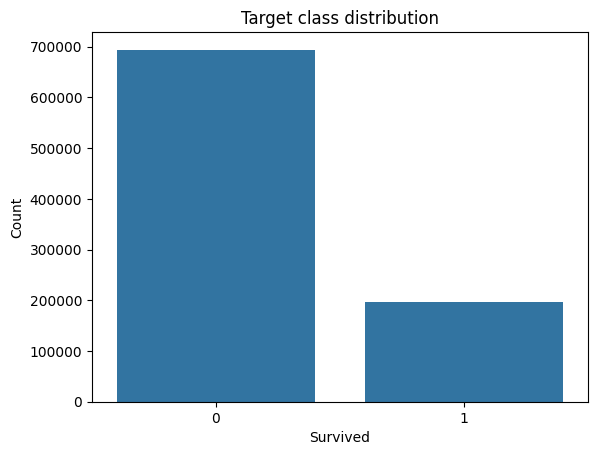

In [7]:
#Target class distribution
sns.countplot(x = "survived", data = lc)
plt.title("Target class distribution")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

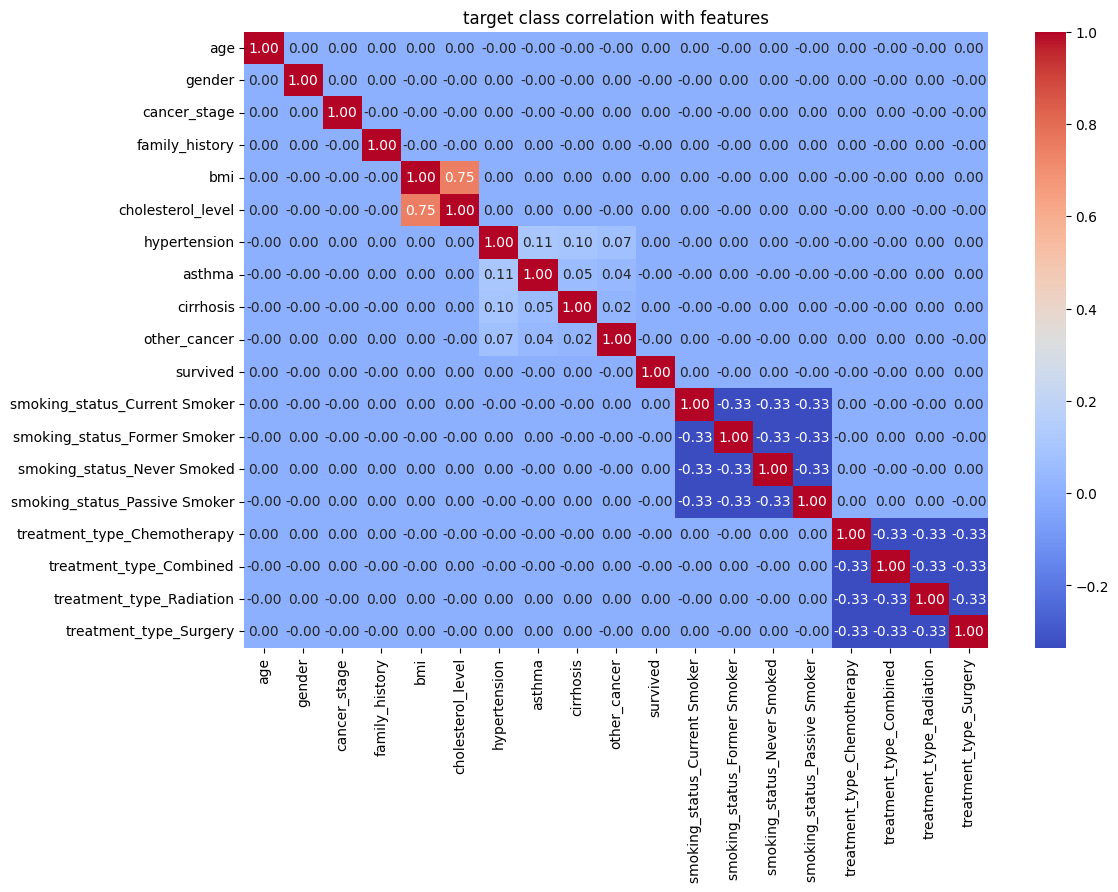

In [27]:
hc = data.copy()
hc = hc.drop(columns= not_sure_col)
plt.figure(figsize = (12,8))
sns.heatmap(hc.corr(), annot = True, fmt = ".2f", cmap = "coolwarm")
plt.title("target class correlation with features")
plt.show()

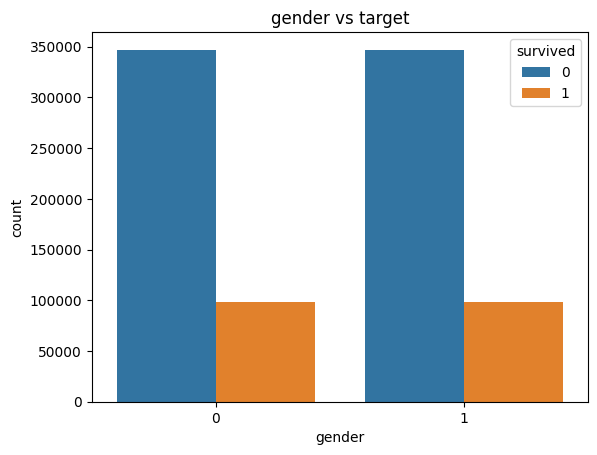

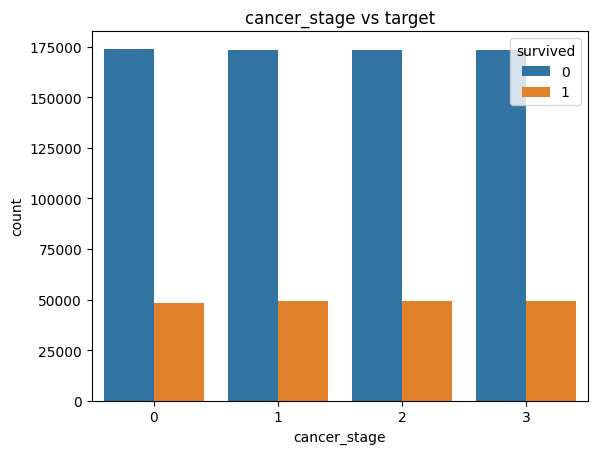

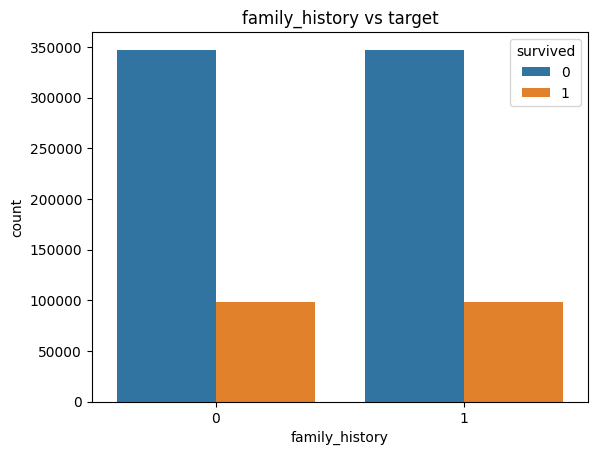

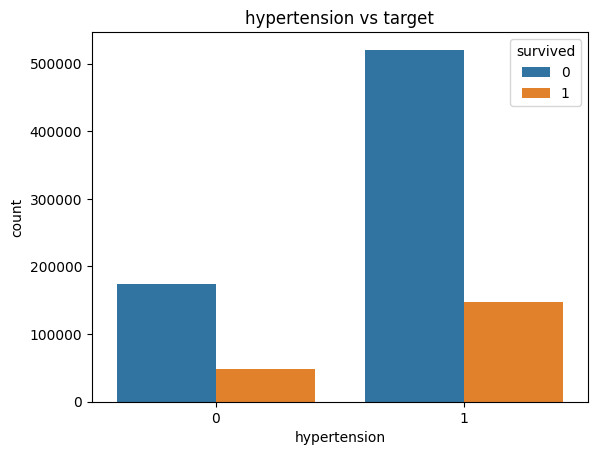

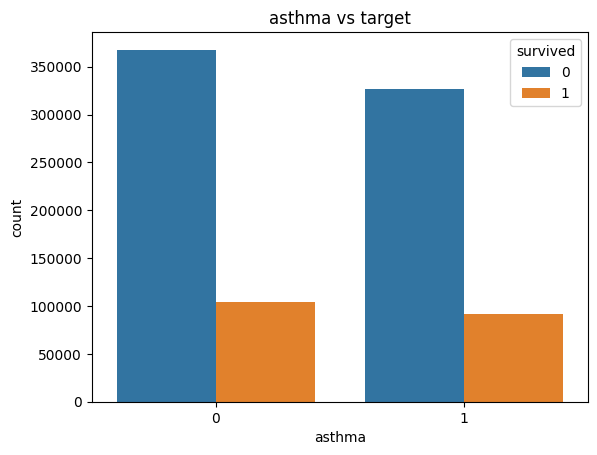

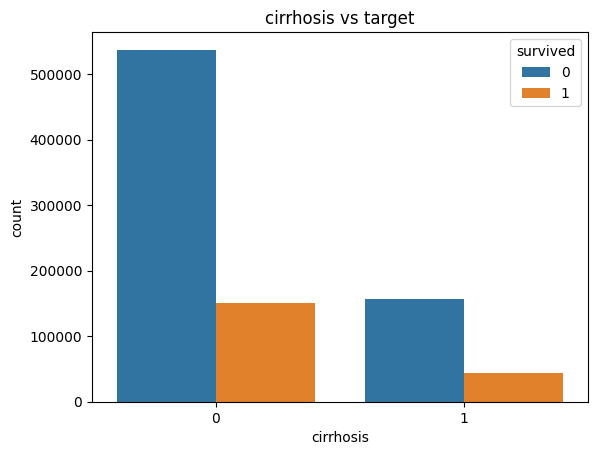

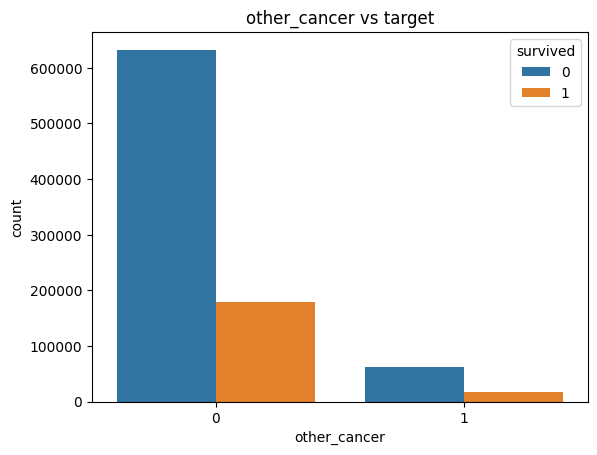

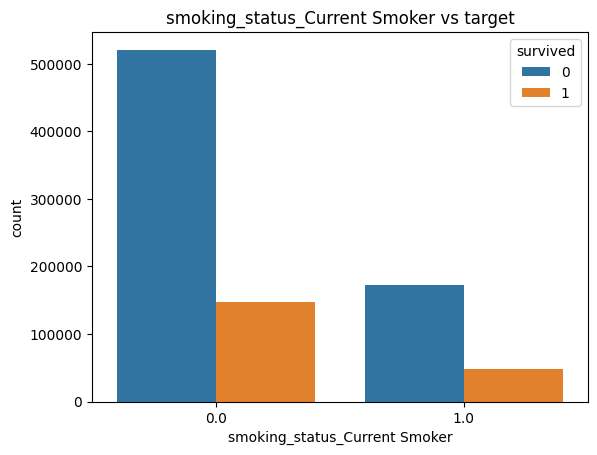

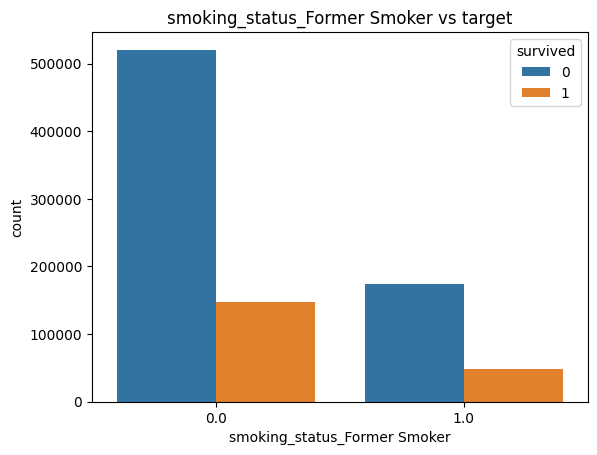

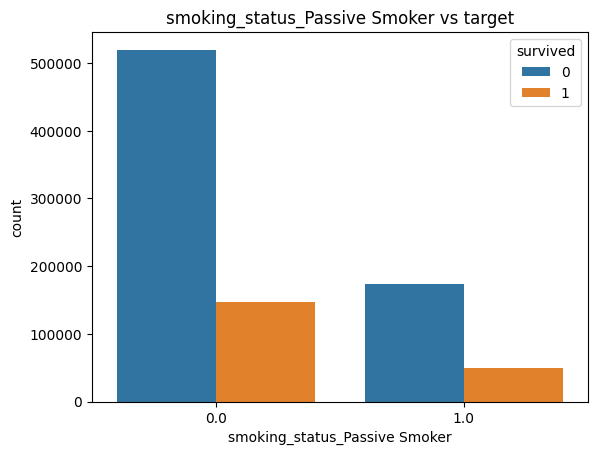

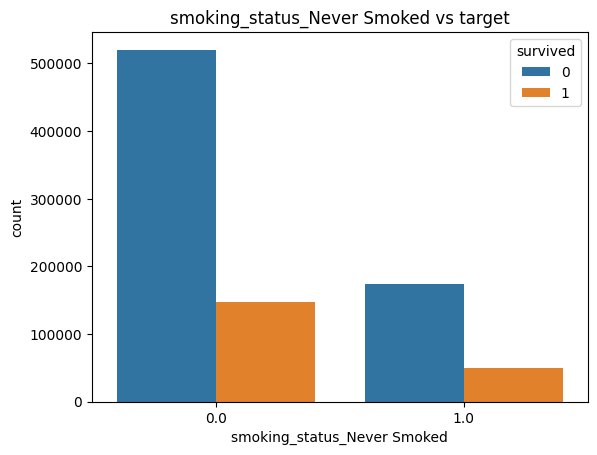

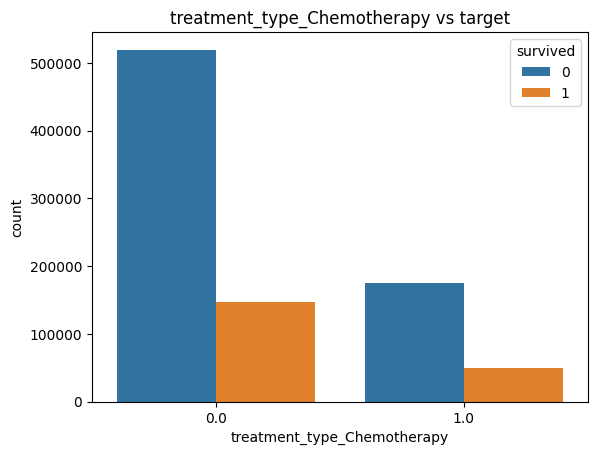

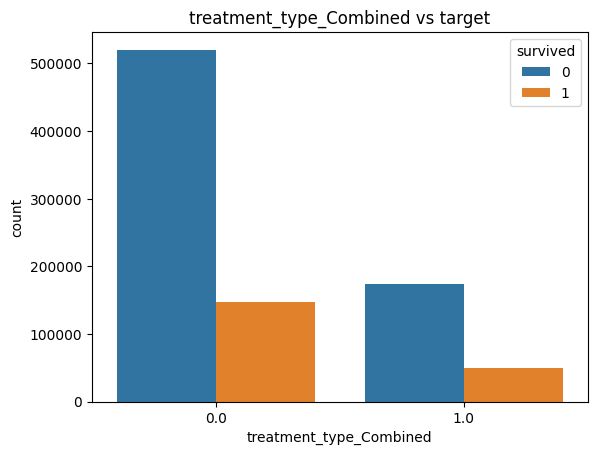

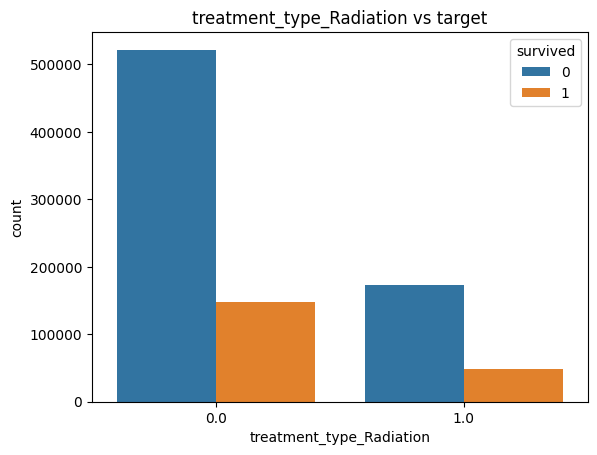

In [ ]:
for col in b_col:
    plt.figure()
    sns.countplot(x = col, hue = 'survived', data = data)
    plt.title(f'{col} vs target')
    plt.show()

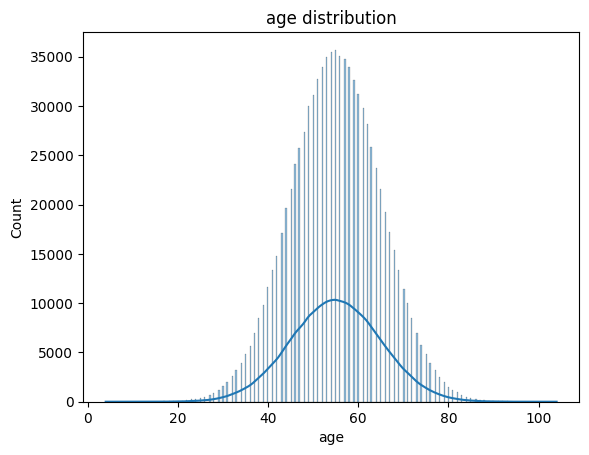

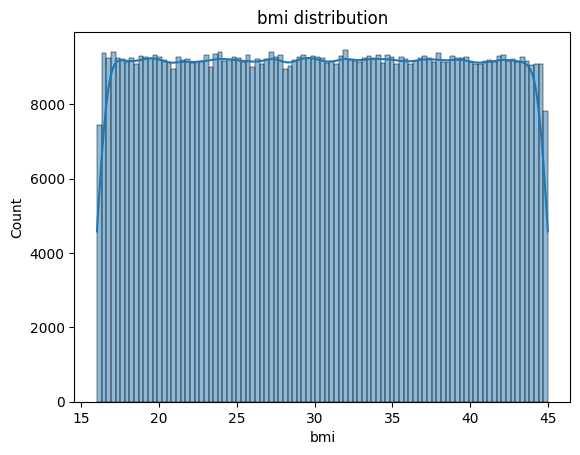

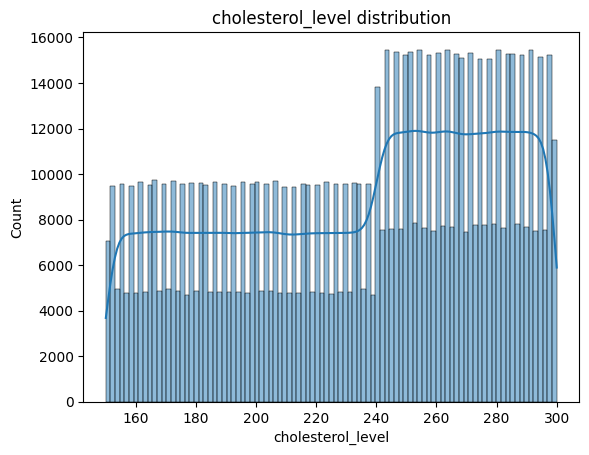

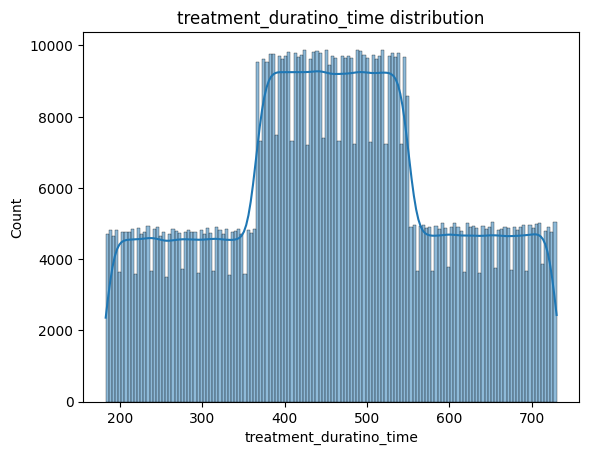

In [22]:
for col in n_col:
    plt.figure()
    sns.histplot(data[col], kde = True)
    plt.title(f'{col} distribution')
    plt.show()